# EMS Session Debug Analysis (New File)

This notebook analyzes the **EMS session** for all subjects to debug data quality issues.
It iterates through all subjects in the config and processes only their EMS session.

In [49]:
%load_ext autoreload
%autoreload 2
import sys
import os
import mne
import matplotlib.pyplot as plt

# Add the parent directory to sys.path to allow importing from src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.config import SUBJECTS, EXCLUDED_SUBJECTS
from src.data_loader import load_data
from src.preprocessing import remove_bad_channels, filtering_referencing, apply_ica_eyes
from src.analysis import make_erp
from src.visualization import plot_grand_average

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
session = "Visual"
group_results = {"normal": [], "conflict": []}

for subject_id in SUBJECTS:
    # Check for exclusion
    if subject_id in EXCLUDED_SUBJECTS.get(session, []):
        print(f"Skipping Subject: {subject_id} (Excluded)")
        continue
        
    print(f"\n--- Processing Subject: {subject_id} ---")
    try:
        # Load
        raw = load_data(subject_id=subject_id, session=session)
        # Preprocess
        raw = remove_bad_channels(raw, subject_id)
        raw = filtering_referencing(raw)
        # ICA
        raw_clean = apply_ica_eyes(raw, plot=False)
        # ERP
        erp_normal = make_erp(raw_clean, condition="normal")
        erp_conflict = make_erp(raw_clean, condition="conflict")
        
        if erp_normal:
            erp_normal.comment = subject_id
            group_results["normal"].append(erp_normal)
        if erp_conflict:
            erp_conflict.comment = subject_id
            group_results["conflict"].append(erp_conflict)
            
    except Exception as e:
        print(f"Error processing {subject_id}: {e}")


--- Processing Subject: 02 ---
Loading data for subject 02, session Visual from /Users/gujianyang/WorkSpace/EEG Project/ds003846
Extracting parameters from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-02/ses-Visual/eeg/sub-02_ses-Visual_task-PredictionError_eeg.vhdr...
Setting channel info structure...
Reading events from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-02/ses-Visual/eeg/sub-02_ses-Visual_task-PredictionError_events.tsv.
Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-02/ses-Visual/eeg/sub-02_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['Fz', 'TP9']
Reading 0 ... 959079  =      0.000 ...  1918.184 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 58
block_1: Visual
block_2: Visual + Vibro
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-03/ses-Visual/eeg/sub-03_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['FC2', 'FC6', 'P5', 'PO3']
Reading 0 ... 965099  =      0.000 ...  1930.230 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 56
block_1: Visual + Vibro
block_2: Visual
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-04/ses-Visual/eeg/sub-04_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['FT7']
Reading 0 ... 937519  =      0.000 ...  1875.071 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 60
block_1: Visual
block_2: Visual + Vibro
block_3: 0
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-05/ses-Visual/eeg/sub-05_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['Fp2', 'AF3', 'FT7', 'FC3']
Reading 0 ... 833459  =      0.000 ...  1666.940 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 58
block_1: Visual + Vibro
block_2: Visual
block_3: 0
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-06/ses-Visual/eeg/sub-06_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['FC2', 'TP9', 'FC4', 'C5', 'FC6', 'C4']
Reading 0 ... 1281549  =      0.000 ...  2563.137 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 55
block_1: Visual
block_2: Visual + Vibro
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


0 bad epochs dropped

--- Processing Subject: 07 ---
Loading data for subject 07, session Visual from /Users/gujianyang/WorkSpace/EEG Project/ds003846
Extracting parameters from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-07/ses-Visual/eeg/sub-07_ses-Visual_task-PredictionError_eeg.vhdr...
Setting channel info structure...
Reading events from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-07/ses-Visual/eeg/sub-07_ses-Visual_task-PredictionError_events.tsv.
Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-07/ses-Visual/eeg/sub-07_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['CP5', 'AF7', 'C6']
Reading 0 ... 942439  =      0.000 ...  1884.900 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 54
block_1: Visual + Vibro
block_2: Visual
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-08/ses-Visual/eeg/sub-08_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['FT7', 'FC3', 'PO4', 'PO8', 'FC2', 'CP5', 'P5']
Reading 0 ... 1057839  =      0.000 ...  2115.712 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 58
block_1: Visual
block_2: Visual + Vibro
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-09/ses-Visual/eeg/sub-09_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['C3', 'FT7', 'C5']
Reading 0 ... 893899  =      0.000 ...  1787.820 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 54
block_1: Visual + Vibro
block_2: Visual
block_3: 0
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-10/ses-Visual/eeg/sub-10_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['FC3', 'FT10', 'FT7', 'AF3', 'CP5']
Reading 0 ... 1029419  =      0.000 ...  2058.877 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 54
block_1: Visual
block_2: Visual + Vibro
block_3: 0
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-11/ses-Visual/eeg/sub-11_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['P7']
Reading 0 ... 907429  =      0.000 ...  1814.891 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 56
block_1: Visual + Vibro
block_2: Visual
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-12/ses-Visual/eeg/sub-12_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['F7', 'P7', 'PO10']
Reading 0 ... 1048859  =      0.000 ...  2097.745 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 54
block_1: Visual
block_2: Visual + Vibro
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-13/ses-Visual/eeg/sub-13_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['FC5', 'TP9', 'FT9', 'C5', 'C2']
Reading 0 ... 933289  =      0.000 ...  1866.609 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 54
block_1: Visual + Vibro
block_2: Visual
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-14/ses-Visual/eeg/sub-14_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['F7', 'F3', 'FC5', 'TP9', 'O1']
Reading 0 ... 933059  =      0.000 ...  1866.143 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 54
block_1: Visual
block_2: Visual + Vibro
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-15/ses-Visual/eeg/sub-15_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['F4', 'F8', 'C3', 'AF3', 'AF4', 'C5']
Reading 0 ... 951829  =      0.000 ...  1903.692 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 54
block_1: Visual + Vibro
block_2: Visual
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-16/ses-Visual/eeg/sub-16_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['O1', 'Oz', 'FT7', 'FT10', 'PO3']
Reading 0 ... 950319  =      0.000 ...  1900.666 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 56
block_1: Visual
block_2: Visual + Vibro
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-17/ses-Visual/eeg/sub-17_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['Fp2', 'F7', 'F3', 'P7', 'O1', 'F5']
Reading 0 ... 902169  =      0.000 ...  1804.361 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 56
block_1: Visual + Vibro
block_2: Visual
block_3: 0
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-18/ses-Visual/eeg/sub-18_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['T8', 'CP5', 'P8', 'O2', 'FT10']
Reading 0 ... 859579  =      0.000 ...  1719.184 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 56
block_1: Visual
block_2: Visual + Vibro
block_3: 0
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-19/ses-Visual/eeg/sub-19_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['T8', 'P7', 'P8', 'C5', 'P5', 'PO7', 'PO3']
Reading 0 ... 924239  =      0.000 ...  1848.511 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 56
block_1: Visual + Vibro
block_2: Visual
block_3: 0
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.003 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


Reading channel info from /Users/gujianyang/WorkSpace/EEG Project/ds003846/sub-20/ses-Visual/eeg/sub-20_ses-Visual_task-PredictionError_channels.tsv.
Bad channels marked: ['F7', 'FC1', 'T7', 'F5', 'PO4']
Reading 0 ... 872569  =      0.000 ...  1745.160 secs...


/Users/gujianyang/WorkSpace/EEG Project/eeg_project/src/data_loader.py:12: RuntimeWarning: Unable to map the following column(s) to to MNE:
cap_size: 54
block_1: Visual
block_2: Visual + Vibro
block_3: 0
  raw = read_raw_bids(bids_path)


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3301 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 16501 samples (33.002 s)

EEG channe

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: divide by zero encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: overflow encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/scipy/linalg/_basic.py:1622: RuntimeWarning: invalid value encountered in matmul
  B = (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: divide by zero encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: overflow encountered in matmul
  return (u @ vh[:rank]).conj().T
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/utils/linalg.py:243: RuntimeWarning: invalid

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 s)

... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 sam

/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: divide by zero encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: overflow encountered in matmul
  mixing = pca_components.T @ mixing
/Users/gujianyang/miniforge3/envs/eeg/lib/python3.10/site-packages/mne/preprocessing/ica.py:2405: RuntimeWarning: invalid value encountered in matmul
  mixing = pca_components.T @ mixing


## Visualization of EMS Results
Compare all subjects for the EMS session.

Normal condition: 19 subjects
Identifying common channels ...


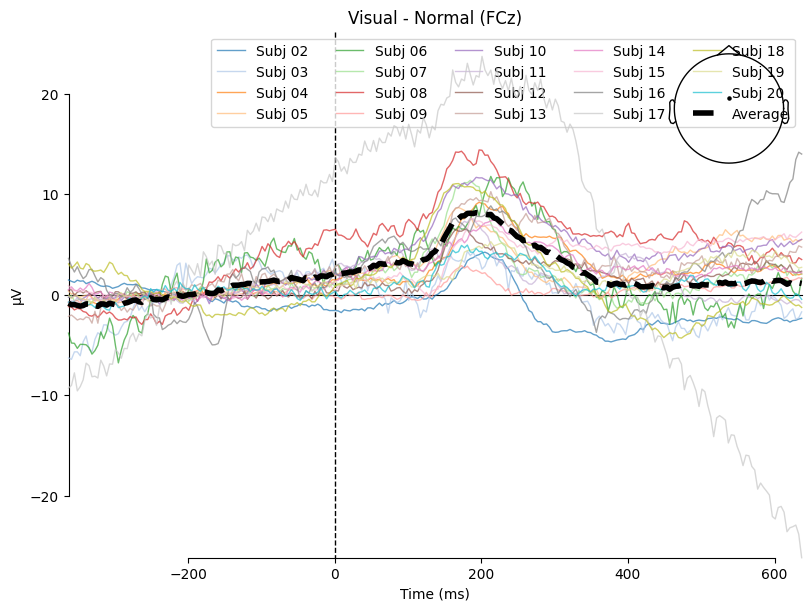

Conflict condition: 19 subjects
Identifying common channels ...


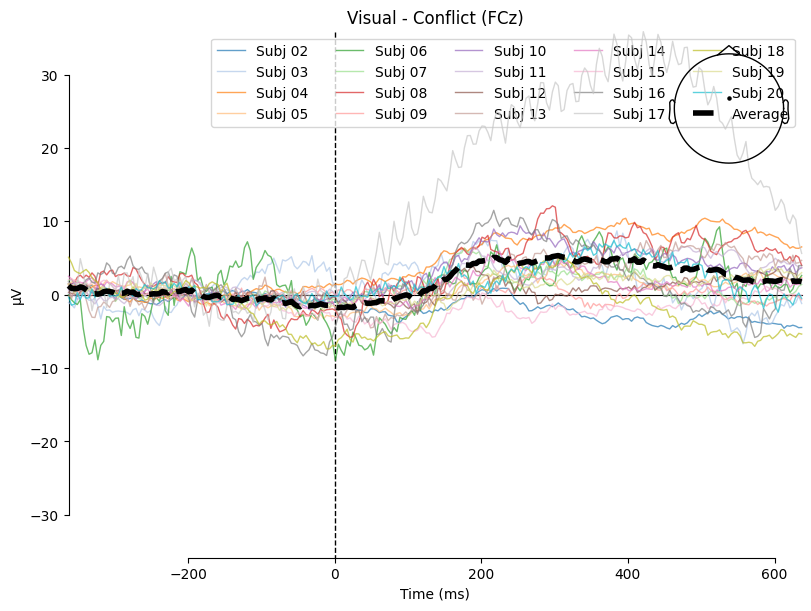

In [51]:
print(f"Normal condition: {len(group_results['normal'])} subjects")
plot_grand_average(group_results["normal"], session, "normal", save=False, show=True)

print(f"Conflict condition: {len(group_results['conflict'])} subjects")
plot_grand_average(group_results["conflict"], session, "conflict", save=False, show=True)